<a href="https://colab.research.google.com/github/bsshreesha/Physics_Informed_Neural_Network/blob/main/Reinforcement_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, diff, latex, Function, sin, cos
from sympy.utilities.lambdify import lambdify
from IPython.display import display, Math
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [72]:
# Define the PINN model
def build_pinn(input_dim, hidden_layers, neurons_per_layer, output_dim):
    inputs = Input(shape=(input_dim,))
    x = inputs
    for _ in range(hidden_layers):
        x = Dense(neurons_per_layer, activation='tanh')(x)
    outputs = Dense(output_dim)(x)
    return Model(inputs=inputs, outputs=outputs)

In [73]:
# Generate equations with initial and boundary conditions
def generate_equations_and_conditions():
    x, t = symbols('x t')  # Spatial and temporal variables
    u = Function('u')(x, t)  # Solution function

    equations = []
    initial_conditions = []
    boundary_conditions = []

    for i in range(1, 11):
        # Define a PDE: u_tt + k * u_xx = sin(k*x)*cos(k*t)
        pde_rhs = sin(i * x) * cos(i * t)
        eq = Eq(diff(u, t, 2) + i * diff(u, x, 2), pde_rhs)
        equations.append(eq)

        # Define initial condition: u(x, 0) = cos(k*x)
        ic = (lambdify(x, cos(i * x), modules="numpy"), lambdify(x, cos(i * x), modules="numpy"))
        initial_conditions.append(ic)

        # Define boundary conditions: u(0, t) = 0, u(1, t) = sin(k*t)
        bc1 = (0, lambdify(t, 0, modules="numpy"))  # u(0, t) = 0
        bc2 = (1, lambdify(t, sin(i * t), modules="numpy"))  # u(1, t) = sin(k*t)
        boundary_conditions.append((bc1, bc2))

    return equations, initial_conditions, boundary_conditions

In [74]:
# Display equations in LaTeX format
def display_equations(equations, initial_conditions, boundary_conditions):
    for i, (eq, ic, bc) in enumerate(zip(equations, initial_conditions, boundary_conditions)):
        print(f"Equation {i+1}:")
        display(Math(f"PDE: {latex(eq)}"))
        display(Math(f"Initial Condition: u(x, 0) = {latex(cos((i+1) * symbols('x')))}"))
        display(Math(f"Boundary Conditions: u(0, t) = 0, u(1, t) = {latex(sin((i+1) * symbols('t')))}"))
        print()

In [75]:
# Numerical solution using a finite difference method (example)
def solve_equation_numerically(equation, initial_condition, boundary_condition, x_range, t_range, dx, dt):
    """
    Solve the PDE numerically using the finite difference method.
    Args:
        equation: The PDE (not used in this minimal example).
        initial_condition: Function for u(x, 0).
        boundary_condition: Tuple of boundary conditions [(x0, u(x0, t)), (x1, u(x1, t))].
        x_range: Range of x values (tuple).
        t_range: Range of t values (tuple).
        dx: Step size in x.
        dt: Step size in t.
    Returns:
        u: Numerical solution as a 2D array.
    """
    x0, x1 = x_range
    t0, t1 = t_range
    nx = int((x1 - x0) / dx) + 1
    nt = int((t1 - t0) / dt) + 1
    x = np.linspace(x0, x1, nx)
    t = np.linspace(t0, t1, nt)

    u = np.zeros((nt, nx))
    u[0, :] = initial_condition(x)  # Apply initial condition

    for n in range(1, nt):
        u[n, 0] = boundary_condition[0][1](t[n])  # Apply BC at x=0
        u[n, -1] = boundary_condition[1][1](t[n])  # Apply BC at x=1
        for i in range(1, nx - 1):
            u[n, i] = u[n - 1, i]  # Simplified for demonstration (to be replaced with actual update rule)

    return x, t, u

# Plot numerical solution
def plot_solution(x, t, u, title="Numerical Solution"):
    plt.figure(figsize=(10, 6))
    plt.contourf(x, t, u, levels=50, cmap="viridis")
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(title)
    plt.show()

Equation 1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 2:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 3:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 4:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 5:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 6:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 7:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 8:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 9:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Equation 10:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

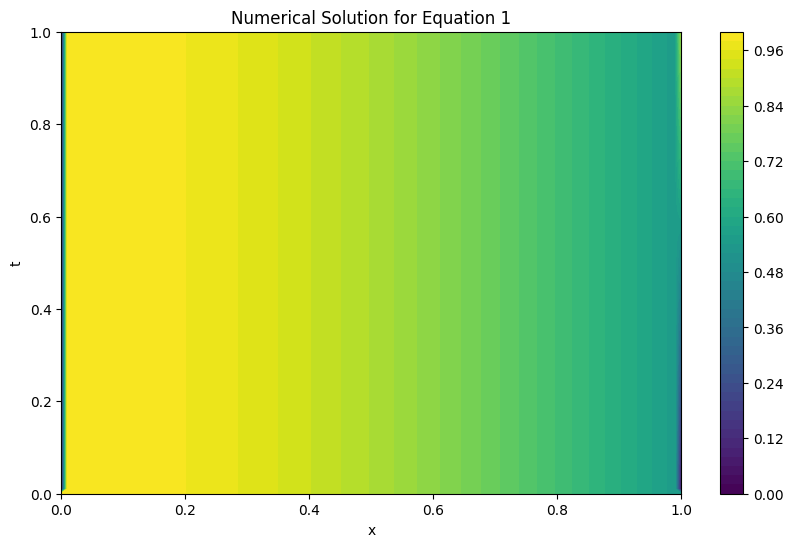

In [76]:
# Main execution
if __name__ == "__main__":
    # Generate equations with initial and boundary conditions
    equations, initial_conditions, boundary_conditions = generate_equations_and_conditions()

    # Display the equations
    display_equations(equations, initial_conditions, boundary_conditions)

    # Solve the first equation numerically (as an example)
    x_range = (0, 1)
    t_range = (0, 1)
    dx = 0.01
    dt = 0.01

    x, t, u = solve_equation_numerically(
        equations[0],
        initial_conditions[0][0],
        boundary_conditions[0],
        x_range,
        t_range,
        dx,
        dt,
    )

    # Plot the numerical solution
    plot_solution(x, t, u, title="Numerical Solution for Equation 1")